#**Aprendizaje Automático** - 2023
# Clase 10: Redes neuronales

*Trabajaron en esta notebook: Sofia Del Pozo, Diego Onna, Gastón Bujía*

## Contenidos

* Introducción a Keras

* Feedforward

* Backpropagation 

* Entrenamiento, epochs, batch

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Repaso de Redes Neuronales

Veamos un poco más sobre las decisiones que tomas las redes jugando un poco en el [Playground de TensorFlow](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4&seed=0.98534&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

Les dejamos una [lista de videos](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) (en Inglés) que pueden ver para profundizar un poco en el funcionamiento de las redes y como aprendemos sus parametros

# Introducción a Keras

Basado en:

- https://keras.io/getting_started/intro_to_keras_for_engineers/
- https://keras.io/examples/structured_data/structured_data_classification_from_scratch/

Existen multiples bibliotecas populares utilizadas para deep learning en Python. Algunas de las más conocidas son:

1. **TensorFlow**: TensorFlow es una biblioteca de código abierto desarrollada por Google. Es una de las bibliotecas más utilizadas para deep learning debido a su flexibilidad y escalabilidad. TensorFlow proporciona una amplia gama de herramientas y funciones para construir y entrenar redes neuronales.

2. **PyTorch**: PyTorch es otra biblioteca de código abierto muy popular para deep learning desarrollada principalmente por Meta. Es conocida por su enfoque dinámico y su interfaz intuitiva. PyTorch permite construir y entrenar redes neuronales con facilidad, y ofrece una gran flexibilidad para experimentar con ideas y modelos.

3. **Keras**: Keras es una biblioteca de alto nivel para construir y entrenar redes neuronales. Aunque originalmente era independiente, a partir de TensorFlow 2.0, Keras se convirtió en la API de alto nivel oficial de TensorFlow. Keras proporciona una interfaz fácil de usar y permite construir modelos de deep learning de forma rápida y sencilla.

En este curso utilizaremos Keras como API para TensorFlow2. [Keras](https://keras.io/getting_started/) es especialmente popular entre los principiantes en deep learning debido a su simplicidad y abstracción. Permite construir y entrenar redes neuronales de manera rápida y sencilla mediante una interfaz de programación de aplicaciones (API) sencilla y modular. Keras se enfoca en la facilidad de uso y la velocidad de desarrollo, al tiempo que proporciona una amplia gama de capas y funciones para construir modelos complejos. Además, Keras ofrece soporte para múltiples bibliotecas de backend, incluyendo TensorFlow y Theano.

En esta notebook veremos a grandes razgos cómo:

* Preparar tus datos antes de entrenar un modelo (convirtiéndolos en matrices NumPy u objetos tf.data.Dataset).

* Realizar el preprocesamiento de datos.

* Construir un modelo que convierta tus datos en predicciones útiles, utilizando la API funcional de Keras.

* Entrenar tu modelo con el método fit() integrado de Keras, prestando atención a la creación de puntos de control, la monitorización de métricas y la tolerancia a fallos.

* Evaluar tu modelo en datos de prueba y cómo utilizarlo para inferir en nuevos datos.


## Carga y preprocesamiento de datos.

Las redes neuronales no procesan datos crudos, como archivos de texto, archivos de imagen JPEG codificados o archivos CSV. En cambio procesan representaciones vectorizadas y estandarizadas.

- Los *archivos de texto* deben leerse en tensores de cadena, luego dividirse en palabras. Finalmente, las palabras deben indexarse y convertirse en tensores enteros.

- Las *imágenes* deben leerse y decodificarse en tensores enteros, luego convertirse a punto flotante y normalizarse a valores pequeños (generalmente entre 0 y 1).

- Los *datos tipo CSV* o *datos tabulares* deben analizarse, con características numéricas convertidas en tensores de punto flotante y características categóricas indexadas y convertidas en tensores enteros. Luego, cada característica suele necesitar ser normalizada a media cero y varianza unitaria.
Etc.

De fondo la estructura clave que usa TensorFlow (y casi todos los sistemas de deep learning) son los **tensores** que son generalizaciones de una matriz. Si quieren profundizar en su entendimiento de como operar con tensores (muy similares a los numpy arrays) les recomendamos mirar un poco este [tutorial](https://keras.io/getting_started/intro_to_keras_for_researchers/).

### Carga de datos

Los modelos de Keras aceptan tres tipos de **entradas**:

* **Matrices NumPy**, al igual que Scikit-Learn y muchas otras bibliotecas basadas en Python. Esta es una buena opción si tus datos caben en memoria.

* **[Objetos TensorFlow Dataset](https://www.tensorflow.org/guide/data)**. Esta es una opción de alto rendimiento más adecuada para conjuntos de datos que no caben en memoria y que se transmiten desde el disco o desde un sistema de archivos distribuido.

* **Generadores de Python** (Python generators) que generan lotes de datos (como subclases personalizadas de la clase keras.utils.Sequence).

Antes de comenzar a entrenar un modelo, deberás hacer que tus datos estén disponibles en uno de estos formatos. Si tienes un conjunto de datos grande y estás entrenando en GPU(s), considera usar objetos Dataset, ya que se encargarán de detalles críticos de rendimiento, como:

* Preprocesar de forma asincrónica tus datos en la CPU mientras tu GPU está ocupada y ponerlos en una cola de almacenamiento en búfer.

* Buscar datos en la memoria de la GPU para que estén disponibles de inmediato cuando la GPU

**Definiciones** Verán que muchas veces cuando usemos los datasets usamos el concepto de *batch*, que representa la cantidad de datos que serán procesados a la hora de entrenar el modelo. Luego el concepto de *epoch* representa la cantidad de veces que se pasará el dataset de entrenamiento por el algoritmo de optimización. Por ejemplo, si un dataset tiene 1024 imagenes, eso representa una epoch y si consideramos batchs de 64 imagenes: 

1 epoch = 16 batchs de 64 = 1024 img.

Keras ofrece una amplia gama de utilidades para ayudarte a convertir datos en brutos en un objeto Dataset como por ejemplo:

- [tf.keras.utils.image_dataset_from_directory](https://keras.io/api/data_loading/image#imagedatasetfromdirectory-function) convierte archivos de imagen clasificados en carpetas específicas de clase en un dataset etiquetado de tensores de imagen.
- [tf.keras.utils.text_dataset_from_directory](https://keras.io/api/data_loading/text#textdatasetfromdirectory-function) hace lo mismo para archivos de texto.

Además, TensorFlow [tf.data](https://www.tensorflow.org/api_docs/python/tf/data) incluye otras utilidades similares, como [tf.data.experimental.make_csv_dataset](https://www.tensorflow.org/api_docs/python/tf/data/experimental/make_csv_dataset) para cargar datos estructurados desde archivos CSV. Veamos unos ejemplos.

#### Ejemplo 1

Obtener un dataset etiquetado a partir de archivos de imagen en disco.

Supongamos que tienes archivos de imagen clasificados por clase en diferentes carpetas, como esta:

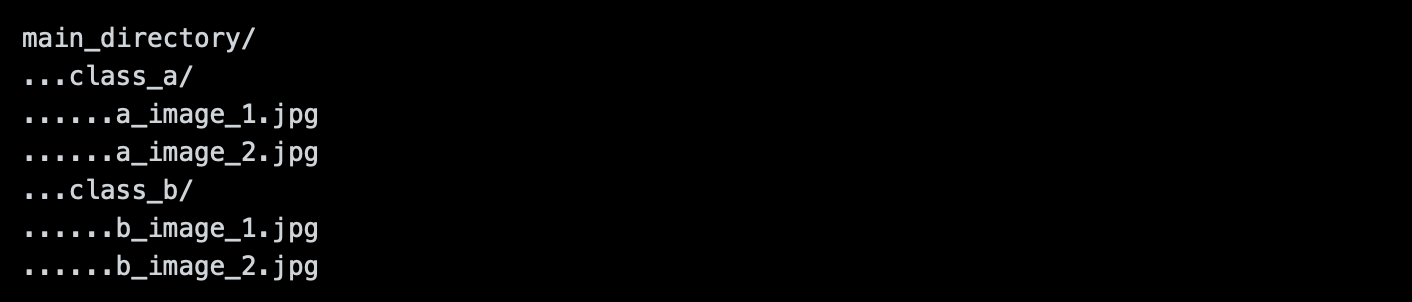

Entonces, podrías hacer lo siguiente:

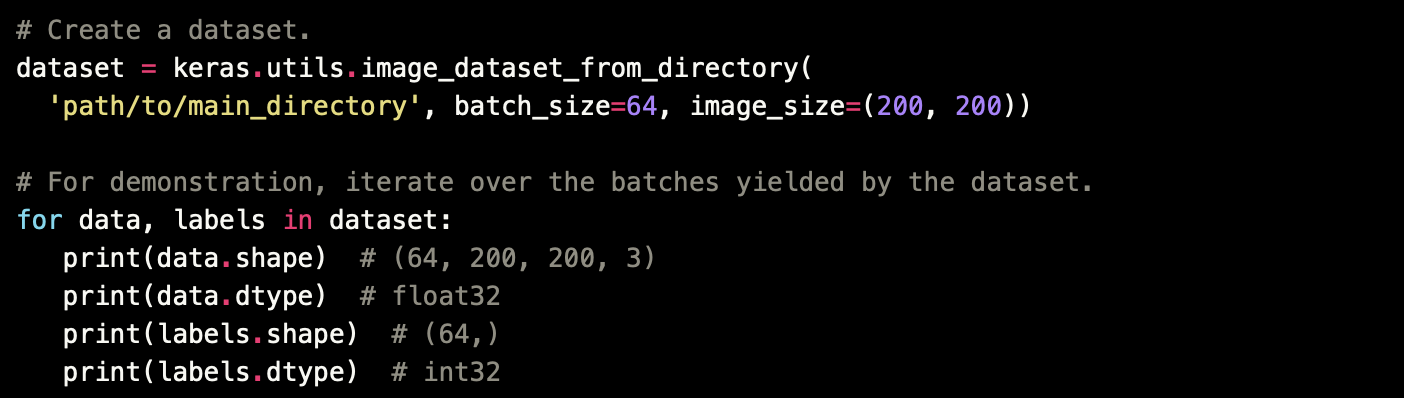

La etiqueta de una muestra es el rango de su carpeta en orden alfanumérico. Naturalmente, esto también puede configurarse explícitamente pasando, por ejemplo, class_names=['class_a', 'class_b'], en cuyo caso la etiqueta 0 será class_a y la 1 será class_b.



#### Ejemplo 2
Obtener un dataset etiquetado a partir de archivos de texto en disco.

De manera similar para el texto: si tienes documentos .txt clasificados por clase en diferentes carpetas, puedes hacer lo siguiente:

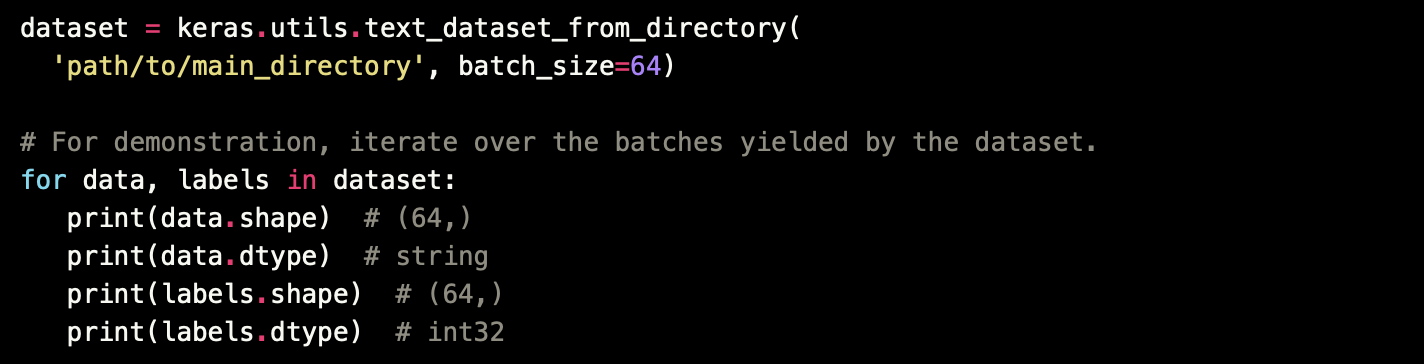

### Preprocesamiento de datos con Keras


Una vez que sus datos están en forma de matrices NumpPy de cadenas/enteros/flotantes, o un objeto Dataset (o generador de Python) que proporciona lotes de tensores de cadenas/enteros/flotantes, es hora de preprocesar los datos. Esto puede significar:

* Tokenización de datos de cadena, seguida de indexación de tokens.

* Normalización de características.

* Redimensionar los datos a valores pequeños (en general, los valores de entrada a una red neuronal deben estar cerca de cero - típicamente esperamos datos con media cero y varianza unitaria, o datos en el rango [0, 1]).

El modelo de aprendizaje automático ideal es end-to-end, lo que significa que debería incluir el preprocesamiento de datos como parte del propio modelo para asegurar la portabilidad y evitar la necesidad de recrear el mismo preprocesamiento al utilizarlo en diferentes aplicaciones o entornos. Esto simplifica el uso del modelo y evita posibles discrepancias que podrían afectar su rendimiento.



#### Uso de capas de preprocesamiento de Keras


En Keras, se realiza el preprocesamiento de datos en el modelo a través de **capas de preprocesamiento**. Esto incluye:

* Vectorización de cadenas de texto sin procesar a través de la capa 
TextVectorization.

* Normalización de características a través de la capa Normalization.

* Redimensionamiento, recorte o aumento de datos de imagen.

La principal ventaja de utilizar capas de preprocesamiento de Keras es que **se pueden incluir directamente en el modelo**, ya sea durante el entrenamiento o después del entrenamiento, lo que hace que sus modelos sean portátiles.

Algunas capas de preprocesamiento tienen un estado:

* TextVectorization mantiene un mapeo de índices de palabras o tokens a enteros.

* Normalization mantiene la media y la varianza de sus características.

El estado de una capa de preprocesamiento se obtiene llamando a `layer.adapt` (equivalente al `fit` de los transformers de Scikit-Learn) en una muestra de los datos de entrenamiento (o en todos ellos).


#####  [Normalizar](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization) features

In [ ]:
from tensorflow.keras.layers import Normalization

# Ejemplo de datos de imagen, con valores en el rango [0, 255]
training_data = np.random.randint(0, 256, size=(64, 200, 200, 3)).astype("float32")
print(f"shape: {training_data.shape}")

normalizer = Normalization(axis=-1)
normalizer.adapt(training_data)

normalized_data = normalizer(training_data)
print("var: %.4f" % np.var(normalized_data))
print("mean: %.4f" % np.mean(normalized_data))


shape: (64, 200, 200, 3)
var: 1.0005
mean: 0.0000


Mientras que los datos de entrenamiento no normalizados:

In [ ]:
print("var: %.4f" % np.var(training_data))
print("mean: %.4f" % np.mean(training_data))

var: 5460.5908
mean: 127.4968


## Clasificación de datos estructurados con Keras

A continuación veremos cómo realizar una clasificación de datos estructurados, utilizando un archivo CSV sin procesar. Nuestros datos incluyen características tanto numéricas como categóricas. Utilizaremos capas de preprocesamiento de Keras para normalizar las características numéricas y vectorizar las características categóricas (usar versión de TensorFlow 2.5 o mayor).

### Preparando la data

Descargaremos [datos](https://archive.ics.uci.edu/ml/datasets/heart+Disease) proporcionados la Fundación Cleveland Clinic para Enfermedades Cardíacas. Es un archivo CSV con 303 filas. Cada fila contiene información sobre un paciente (una muestra), y cada columna describe un atributo del paciente (una característica). Utilizamos las características para predecir si un paciente tiene una enfermedad cardíaca (clasificación binaria).

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Cargamos la data
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
dataframe = pd.read_csv(file_url)

In [ ]:
dataframe.shape

(303, 14)

In [ ]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


La última columna, "target", indica si el paciente tiene una enfermedad cardíaca (1) o no (0).

Dividimos los datos en un conjunto de entrenamiento y validación:

In [ ]:
val_dataframe = dataframe.sample(frac=0.2, random_state=1337)
train_dataframe = dataframe.drop(val_dataframe.index)

print("Using %d samples for training and %d for validation" % (len(train_dataframe), len(val_dataframe)))

Using 242 samples for training and 61 for validation



Generemos objetos [tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) para cada dataframe. *Sugerencia*: Para entender bien lo que esta sucediendo, pueden ver un poco que hace la función `from_tensor_slices`.

In [ ]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("target")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

Cada Dataset proporciona una tupla (input, target), donde input es un diccionario de características y target es el valor 0 o 1:





In [ ]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'age': <tf.Tensor: shape=(), dtype=int64, numpy=49>, 'sex': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'cp': <tf.Tensor: shape=(), dtype=int64, numpy=4>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=130>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=269>, 'fbs': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'restecg': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=163>, 'exang': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'slope': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'ca': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'thal': <tf.Tensor: shape=(), dtype=string, numpy=b'normal'>}
Target: tf.Tensor(0, shape=(), dtype=int64)


Agrupamos los conjuntos de datos por batches:

In [ ]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

### Preprocesamiento de características con capas de Keras


Las siguientes características son características categóricas codificadas como enteros:

* sex
* cp
* fbs
* restecg
* exang
* ca

Codificaremos estas características utilizando **one-hot encoding**. Tenemos dos opciones:

* Usar CategoryEncoding(), que requiere conocer el rango de valores de entrada y generará un error en entradas fuera del rango.

* Usar IntegerLookup(), que creará una tabla de búsqueda para las entradas y reservará un índice de salida para valores de entrada desconocidos.

Para este ejemplo, queremos una solución simple que maneje las entradas fuera de rango durante la inferencia, por lo que usaremos IntegerLookup().

También tenemos una característica categórica codificada como una cadena: thal. Crearemos un índice de todas las posibles características y codificaremos la salida utilizando la capa StringLookup().

Finalmente, las siguientes características son características numéricas continuas:

* age
* trestbps
* chol
* thalach
* oldpeak
* slope

Para cada una de estas características, utilizaremos una capa de Normalization() para asegurarnos de que la media de cada característica sea 0 y su desviación estándar sea 1.

A continuación, definimos 3 funciones auxiliares para realizar las operaciones:

* encode_numerical_feature para aplicar normalización de características a nivel de característica a características numéricas.

* encode_string_categorical_feature para convertir primero las entradas de cadena en índices enteros, y luego codificar en one-hot estos índices enteros.

* encode_integer_categorical_feature para codificar en one-hot características categóricas enteras.

In [ ]:
from tensorflow.keras.layers import IntegerLookup
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import StringLookup

def encode_numerical_feature(feature, name, dataset):
    # Crea una capa de Normalization para nuestra característica
    normalizer = Normalization()

    # Prepara un Dataset que solo produzca nuestra característica
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Aprende las estadísticas de los datos
    normalizer.adapt(feature_ds)

    # Normaliza la característica de entrada
    encoded_feature = normalizer(feature)
    return encoded_feature

def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Crea una capa de lookup que convierta las cadenas en índices enteros
    lookup = lookup_class(output_mode="binary")

    # Prepara un Dataset que solo produzca nuestra característica
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Aprende el conjunto de posibles valores de cadena y les asigna un índice entero fijo
    lookup.adapt(feature_ds)

    # Convierte la entrada de cadena en índices enteros
    encoded_feature = lookup(feature)
    return encoded_feature

Ahora debemos aplicar estas transformaciones a los datos para poder pasarlo al tipo de datos que necesita Keras y TensorFlow.

In [ ]:
# Features categóricas codificadas como enteros
sex = keras.Input(shape=(1,), name="sex", dtype="int64")
cp = keras.Input(shape=(1,), name="cp", dtype="int64")
fbs = keras.Input(shape=(1,), name="fbs", dtype="int64")
restecg = keras.Input(shape=(1,), name="restecg", dtype="int64")
exang = keras.Input(shape=(1,), name="exang", dtype="int64")
ca = keras.Input(shape=(1,), name="ca", dtype="int64")

# Features feature codificadas como string
thal = keras.Input(shape=(1,), name="thal", dtype="string")

# Features numericas
age = keras.Input(shape=(1,), name="age")
trestbps = keras.Input(shape=(1,), name="trestbps")
chol = keras.Input(shape=(1,), name="chol")
thalach = keras.Input(shape=(1,), name="thalach")
oldpeak = keras.Input(shape=(1,), name="oldpeak")
slope = keras.Input(shape=(1,), name="slope")

all_inputs = [
    sex,
    cp,
    fbs,
    restecg,
    exang,
    ca,
    thal,
    age,
    trestbps,
    chol,
    thalach,
    oldpeak,
    slope,
]

# Features categoricas (enteros)
sex_encoded = encode_categorical_feature(sex, "sex", train_ds, False)
cp_encoded = encode_categorical_feature(cp, "cp", train_ds, False)
fbs_encoded = encode_categorical_feature(fbs, "fbs", train_ds, False)
restecg_encoded = encode_categorical_feature(restecg, "restecg", train_ds, False)
exang_encoded = encode_categorical_feature(exang, "exang", train_ds, False)
ca_encoded = encode_categorical_feature(ca, "ca", train_ds, False)

# Features categoricas (strings)
thal_encoded = encode_categorical_feature(thal, "thal", train_ds, True)

# Features numericas
age_encoded = encode_numerical_feature(age, "age", train_ds)
trestbps_encoded = encode_numerical_feature(trestbps, "trestbps", train_ds)
chol_encoded = encode_numerical_feature(chol, "chol", train_ds)
thalach_encoded = encode_numerical_feature(thalach, "thalach", train_ds)
oldpeak_encoded = encode_numerical_feature(oldpeak, "oldpeak", train_ds)
slope_encoded = encode_numerical_feature(slope, "slope", train_ds)

all_features = layers.concatenate(
    [
        sex_encoded,
        cp_encoded,
        fbs_encoded,
        restecg_encoded,
        exang_encoded,
        slope_encoded,
        ca_encoded,
        thal_encoded,
        age_encoded,
        trestbps_encoded,
        chol_encoded,
        thalach_encoded,
        oldpeak_encoded,
    ]
)

### Contruir el modelo: enfoque funcional

Existen multiples maneras de construir modelos en Keras y cuales utilicemos dependerá de que tipo de modelo y tipo de datos tengamos. Nosotros utilizaremos el módulo más general que es el módulo funcional, en el cual construiremos el modelo capa a capa como una función usando como base la clase [`Model`](https://keras.io/api/models/model/) y las capas que nos proporciona el módulo [`layers`](https://keras.io/api/layers/).

**Observación** Otro módulo importante que nos proporciona Keras es **[Sequential](https://keras.io/guides/sequential_model/)** para construir una [*Red Feedfoward*](https://en.wikipedia.org/wiki/Feedforward_neural_network) que tenga de entrada un tensor y como salida otro tensor.

In [ ]:
# Primero creamos la primer capa oculta que se conectará con la entrada que tiene dimension igual a all_features.shape
# La forma de hacerlo es crear una nueva funcion x que sear aplicar la capa a la entrada
# En este caso será una capa densa de 32 unidades con activación ReLU
hidden1 = layers.Dense(units=32, activation="relu")(all_features)

# Segundo agregamos una nueva capa de otro estilo, llamada dropout que no es tecnicamente una capa sino una etapa de regularizacion
droput1 = layers.Dropout(0.5)(hidden1)

# Finalmente agregamos una última capa con una salida solamente ya que se trata de un problema de clasificación binaria
output = layers.Dense(1, activation="sigmoid")(droput1)

Ahora debemos crear una instancia del modelo funcional. Aquí, inputs se refiere a la capa de entrada definida en el paso anterior, y outputs es la capa de salida del modelo.

In [ ]:
model = keras.Model(all_inputs, output)

Ahora debemos proceder a *compilar* el modelo, en este paso, se define el optimizador utilizado para ajustar los pesos del modelo, la función de pérdida que se utilizará para evaluar la calidad del modelo y las métricas que se desean calcular durante el entrenamiento.

In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

Visualizamos el grafo de conectividad

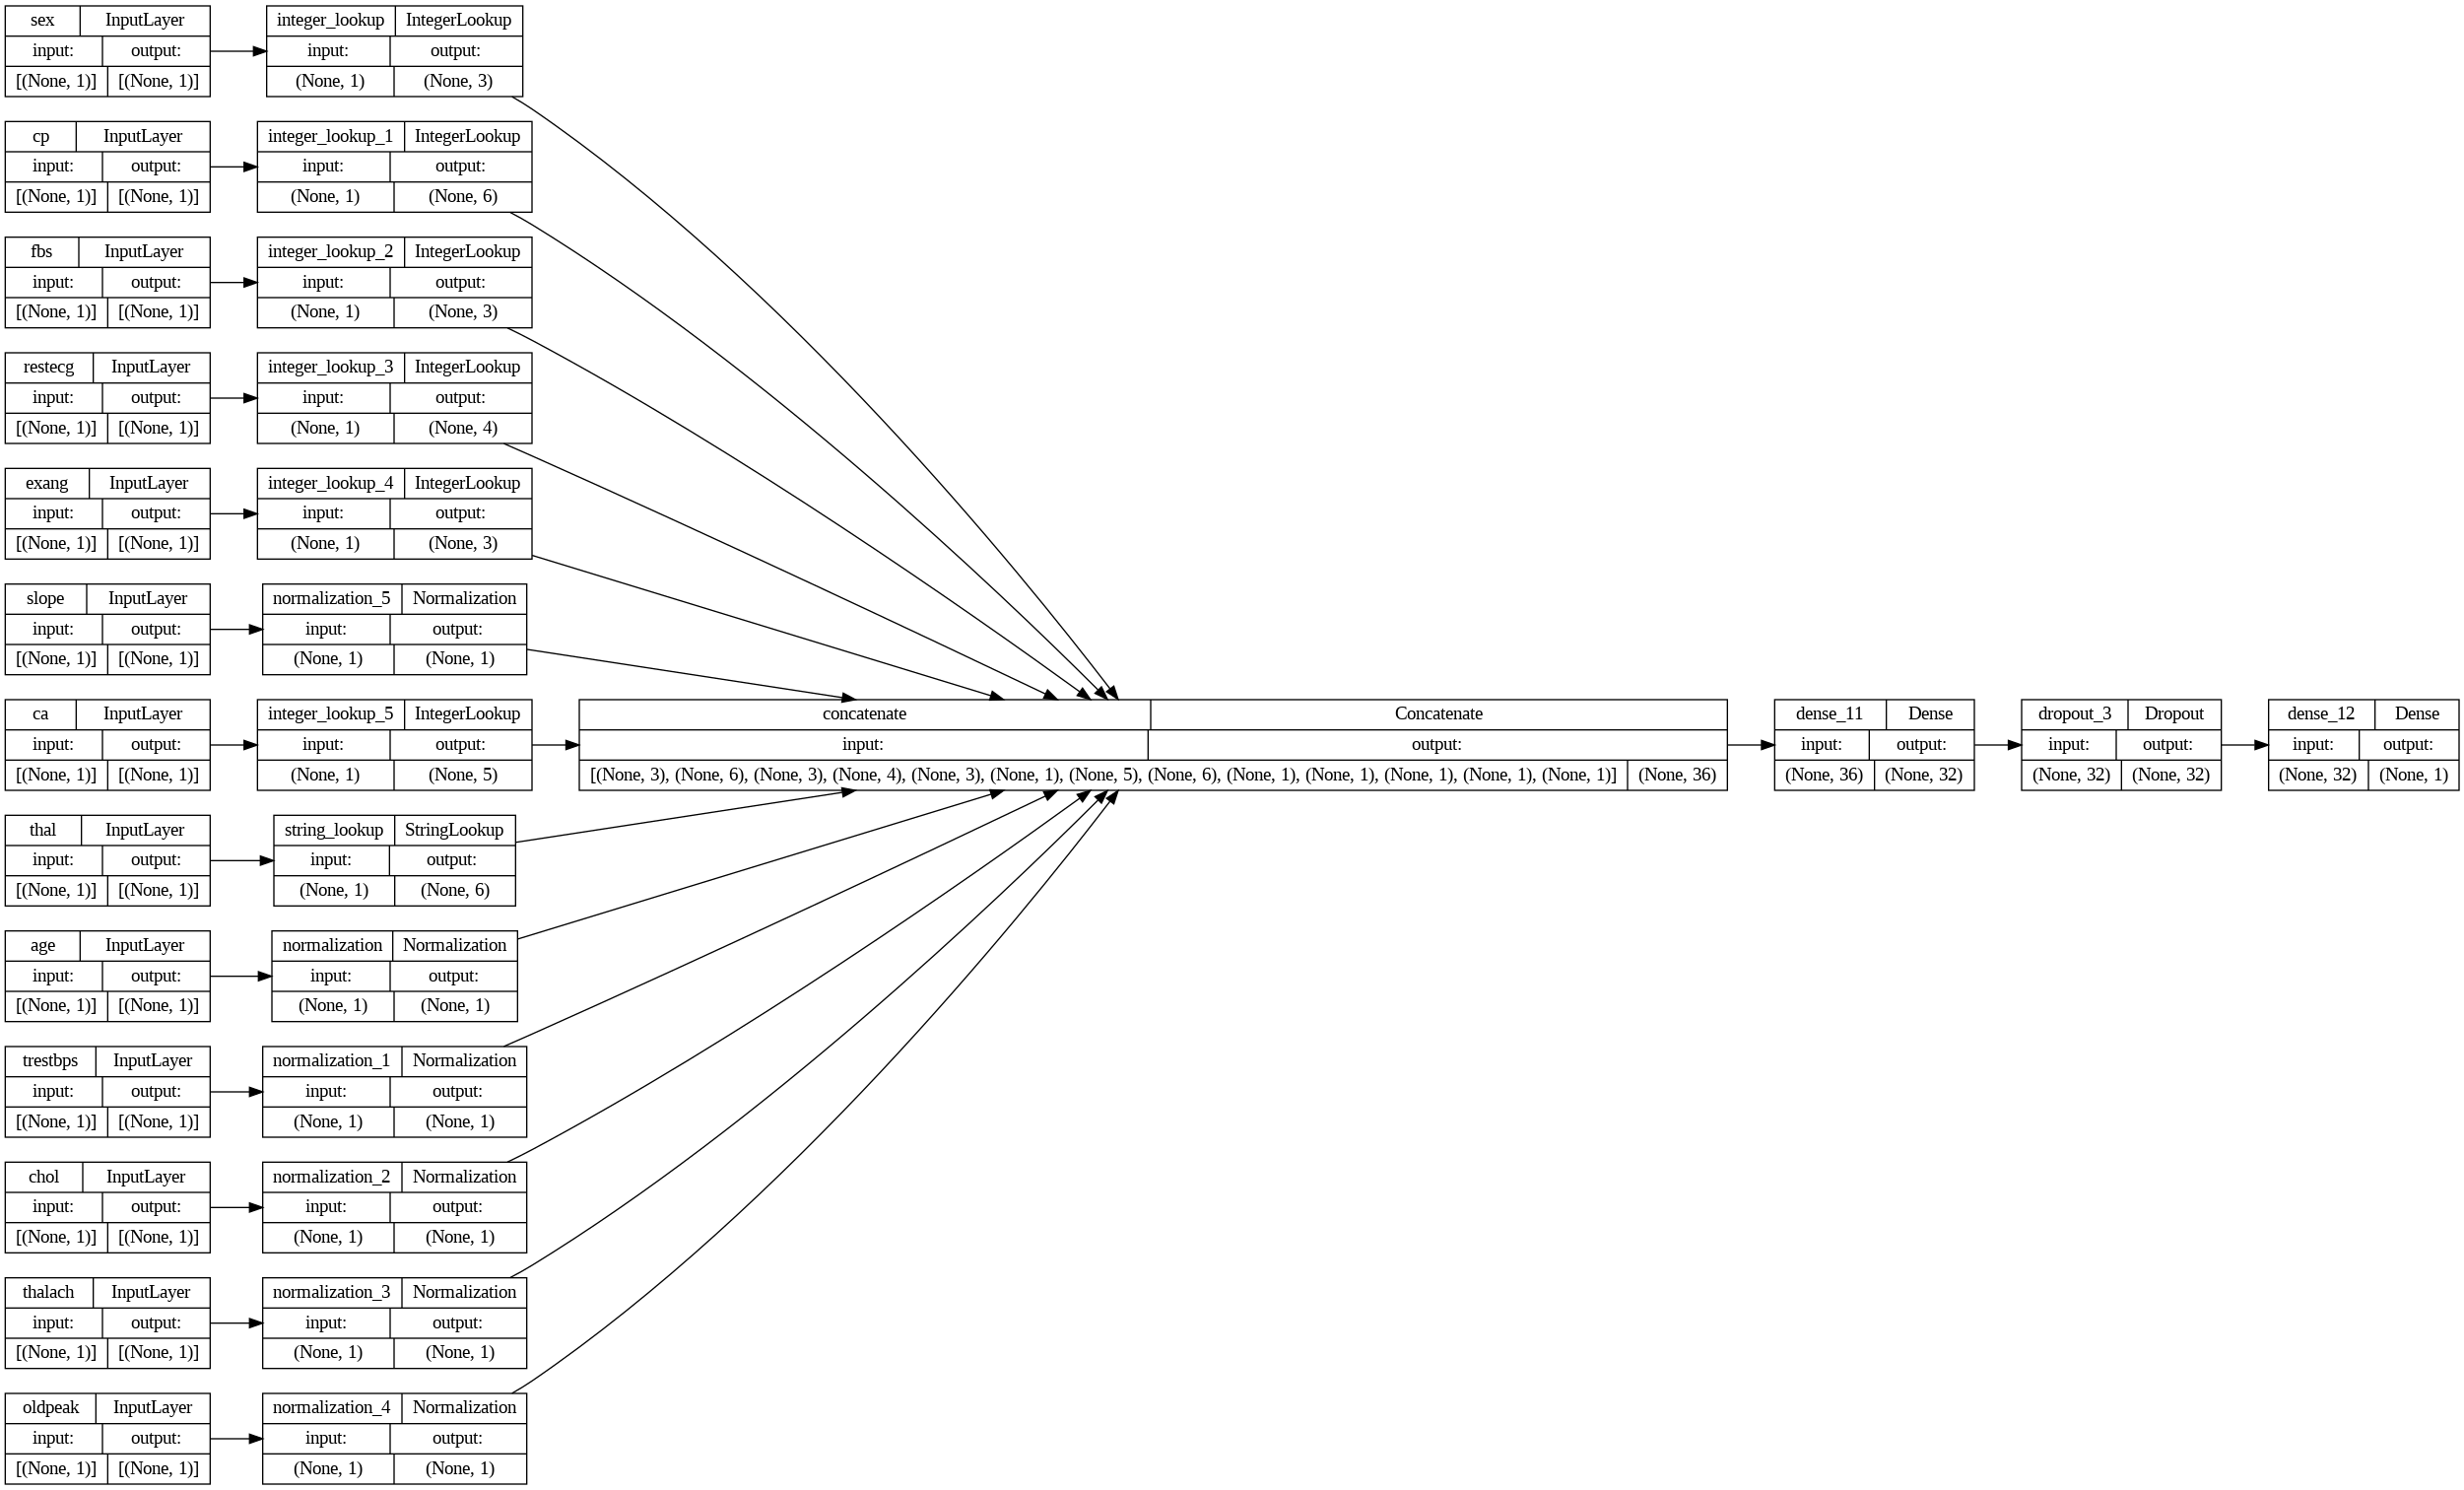

In [ ]:
# `rankdir='LR'` es para hacer el grafo horizontal
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [ ]:
# Otra manera es visualizarlo con el summary pero en este caso sin usar sequential puede no ser tan informativo
#model.summary()

### Entrenamos el modelo

In [ ]:
model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
8/8 [==============================] - 2s 66ms/step - loss: 0.7079 - accuracy: 0.5826 - val_loss: 0.6743 - val_accuracy: 0.6230
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6330 - accuracy: 0.6529 - val_loss: 0.6139 - val_accuracy: 0.6721
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6336 - accuracy: 0.6570 - val_loss: 0.5712 - val_accuracy: 0.7541
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5565 - accuracy: 0.7066 - val_loss: 0.5368 - val_accuracy: 0.7541
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.5348 - accuracy: 0.7149 - val_loss: 0.5108 - val_accuracy: 0.7541
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.5226 - accuracy: 0.7149 - val_loss: 0.4923 - val_accuracy: 0.7705
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5135 - accuracy: 0.7273 - val_loss: 0.4779 - val_accuracy: 0.7705
Epoch 8/50
8/8 [=================

Alcanzamos rápidamente una precisión de validación del 80%.


### Inferencia en nuevos datos

Para obtener una predicción para una nueva muestra, simplemente puedes llamar a model.predict(). Solo hay dos cosas que debes hacer:
* envolver los escalares en una lista para tener una dimensión de lote (los modelos solo procesan lotes de datos, no muestras individuales)

* llamar a convert_to_tensor en cada característica

In [ ]:
sample = {
    "age": 60,
    "sex": 1,
    "cp": 1,
    "trestbps": 145,
    "chol": 233,
    "fbs": 1,
    "restecg": 2,
    "thalach": 150,
    "exang": 0,
    "oldpeak": 2.3,
    "slope": 3,
    "ca": 0,
    "thal": "fixed",
}

# Tenemos que convertir todo a tensores porque es lo que entiende Keras
input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)

print(
    "Este paciente en particular tiene una probabilidad del %.1f por ciento "
    "of having a heart disease, as evaluated by our model." % (100 * predictions[0][0],)
)

1/1 [==============================] - 0s 404ms/step
Este paciente en particular tiene una probabilidad del 16.5 por ciento of having a heart disease, as evaluated by our model.


# Ejercicio



1. Agreguen primero a las metricas (dentro del `compile`) precision y recall. Entrenen nuevamente el mismo modelo y reporten dichas métricas (ver [recall](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall) y [precision](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision)). Pueden probar tambien cambiar el optimizador, ver https://keras.io/api/optimizers/:
```
# Instanciar un optimizer
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss=loss, optimizer=opt)
```
2. Guarden la historia de entrenamiento del modelo de la siguiente manera:
```
# Recorrer los pasos de entrenamiento
for epoch in range(num_epochs):
        history = model.fit(X_train, y_train, batch_size=batch_size)
```
Inspeccionen que se almacena en la variable history, ¿puede graficar una curva de entrenamiento? 
3. Experimente cambiando el learning rate, elija al menos 5 valores y grafique las curvas de aprendizajes de dichos modelos.
4. Cree un nuevo modelo en el cual utilice al menos dos capas densas, cambie la función de activación. Comparelo con los modelos anteriores.
5. Cree un nuevo modelo igual al primero donde no utilice Dropout. Comparelo con los modelos anteriores. Puede también experimentar cambiando el valor de Dropout, ¿que efectos en las métricas puede ver sobre el modelo?